<a href="https://colab.research.google.com/github/abigaylerose03/Machine-Learning/blob/master/AI4ALL_Personal_Project_Abigayle_Peterson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to your AI4ALL Personal Project**



---


In this project you will:


*   Examine and select an open dataset from Kaggle
*   Read your dataset in using Pandas and google sheets
* Look up and change data types
* Investigate patterns in the data
* Create features (feature engineering)
* Test different machine learning algorithms
* Evaluate how well your algorithms work



---
You may need to do your own research to adapt some parts of this code to your own project/dataset. Part of learning to code is learning how to google things really well when you encounter something new! Stack overflow is a good website to look at where people post problems they're having and get help from others. 


---

# **PART 1**

---



In [ ]:
# Connecting your google drive with colab so you can access data from spreadsheets
# You will need to run this code and enter a key to authenticate every day/session
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# Import the python packages we want to use
# Pandas helps us explore and manipulate the data
# Matplotlib helps us to graph and plot the data
import pandas as pd
import matplotlib.pyplot as plt



---



---


Next, you need to call the specific google spreadsheet you want to work with. The first spreadsheet is from goodreads. Goodreads is a website where people can rate and leave reviews for books. Read more about this dataset and what type of data is in each column here: https://www.kaggle.com/jealousleopard/goodreadsbooks


---


This notebook will step through the goodreads dataset, but you should also see if you can apply and adapt this code to a new dataset for your personal project.


---


You should investigate each of the other three datasets, then select one to use.


*   Pokemon: https://www.kaggle.com/abcsds/pokemon
*   World Happiness Report 2019: https://www.kaggle.com/unsdsn/world-happiness
* Olympics: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results


---
To use a different dataset, comment out (type # in front of) the goodreads line and uncomment (take away the #) the dataset you want to use. Since you are naming that dataset wb (short for "work book") on each line, the rest of the code will work no matter which dataset you use.


---






In [ ]:
# Goodreads data
# wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1nnjEpRJ-LeCer_Yy8mB5Mob7-8JZ7Wn7bk2d2QwxCts/edit#gid=2131638054')

# Pokemon data
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/12ijtfaDvM7jIZK3yyyr_v_P858dIKhVdl7FhH_1Bm1k/edit#gid=1035266987')

# World Happiness Report 2019 data
#wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1bwIXIzmE77O1Gsmp3_H3vveAExYyZ17mkGagq-4PNtY/edit#gid=906238556')

# Olympics data
#wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1SuHeBfBeMbvPIQwHQUnvNCpOUrCLrjGAhKExaLREHYA/edit#gid=709589584')

In [ ]:
# Import your data into a Pandas data frame
# You may have to change the name of the sheet to match the sheet you are pulling from your spreadsheet - pay attention to capitalization!
sheet = wb.worksheet('data') #change this sheet name for a new dataset
data = sheet.get_all_values()

# Pandas stores data in a 'data frame'
df = pd.DataFrame(data)

# Set the headings
df.columns = df.iloc[0]
df = df.iloc[1:]

# Print the first few lines of the data frame to check that everything looks good
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
4,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
5,4,Charmander,Fire,,309,39,52,43,60,50,65,1,FALSE


In [ ]:
# Check the data types in your data frame. Are they all correct? 
# Usually pandas imports everything as an object, which means you will need to tell is which data type each column should be.
# You should do this so you can do math with data that includes numbers, etc.

df.dtypes

0
#             object
Name          object
Type 1        object
Type 2        object
Total         object
HP            object
Attack        object
Defense       object
Sp. Atk       object
Sp. Def       object
Speed         object
Generation    object
Legendary     object
dtype: object



---



---


For more information about data types in pandas, and what the options for data types are, read this: https://pbpython.com/pandas_dtypes.html


---



In [ ]:
# creating a dictionary for the goodreads data to set each column to the data type it should be




---


For a challenge, you can try to convert the data type for publication date. 

Hint: you will have to manipulate the data before giving it a type. There are multiple ways you might convert this data. To think about what you want to do, first think about why you would use this data. Do you only need the year? Do you need all the information in the publication date column?


---

We've helped you do this for the Pokemon, Olympics, and World Happiness Report data with the code snippets below. If you're using a different dataset, you'll have to do this yourself.


---



---



In [ ]:
# Pokemon data
new_df = {
    'Name': df['Name'].astype(str),
    'Type1': df['Type 1'].astype(str),
    'Type2': df['Type 2'].astype(str),
    'Total': df['Total'].astype(int),
    'HP': df['HP'].astype(int),
    'Attack': df['Attack'].astype(int),
    'Defense': df['Defense'].astype(int),
    'SpecialAttack': df['Sp. Atk'].astype(int),
    'SpecialDefense': df['Sp. Def'].astype(int),
    'Speed': df['Speed'].astype(int),
    'Generation': df['Generation'].astype(int),
    'Legendary': df['Legendary'].astype(str) # had to convert to a string instead of a boolean
}

In [ ]:
"""
I wrote this code to look at the data 
"""

pokemon_df = pd.DataFrame(new_df)
pokemon_df.head()

# pokemon_df["Legendary"].replace({True: False}, inplace=True)
pokemon_df.head()

,Name,Type1,Type2,Total,HP,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
4,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
5,Charmander,Fire,,309,39,52,43,60,50,65,1,FALSE


In [ ]:
# And check to make sure all our data types are correct
pokemon_df.dtypes

Name              object
Type1             object
Type2             object
Total              int64
HP                 int64
Attack             int64
Defense            int64
SpecialAttack      int64
SpecialDefense     int64
Speed              int64
Generation         int64
Legendary         object
dtype: object



---


Next, we want to explore the data. What are some patterns we can observe? These patterns might help us decide what types of data to use in machine learning later.

Use the column name inside the brackets, and try using 'describe' to understand your dataset. Some examples from the goodreads set are below. Notice how the same code - 'describe' - has different output when the data type is different.


---
You can read more about grouping and exploring your data here: https://realpython.com/pandas-python-explore-dataset/  

and here: https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas


---



---




In [ ]:
"""
Analyzed type1 counts 
"""
pokemon_df['Name'].describe()
print(pokemon_df['Type1'].value_counts())

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type1, dtype: int64


In [ ]:
pokemon_df['Type1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type1, dtype: int64

In [ ]:
pokemon_df['Type1'].describe()

count       800
unique       18
top       Water
freq        112
Name: Type1, dtype: object

In [ ]:
pokemon_df['Attack'].describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

In [ ]:
pokemon_df['Total'].describe()

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: Total, dtype: float64



---


You can also use matplotlib to make some graphs. Read more about how to do that 

here: https://ourcodingclub.github.io/tutorials/pandas-python-intro/#matplotlib 

and here: https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot


---



---



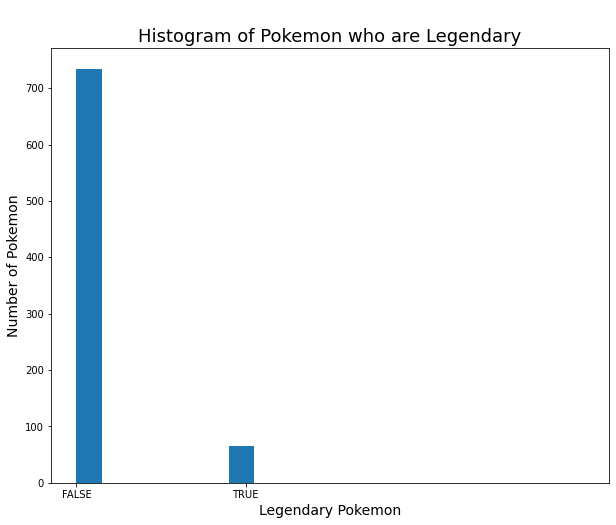

In [ ]:
"""
I wrote this code to determine if a Pokemon was legendary or not
"""
plt.figure(figsize=(10,8))
plt.hist(pokemon_df['Legendary'], bins=20, range=(0, 3))
plt.title('\nHistogram of Pokemon who are Legendary', fontsize=18)
plt.ylabel('Number of Pokemon', fontsize=14)
plt.xlabel('Legendary Pokemon', fontsize=14)
plt.show()





---


Using groupby can be very powerful. The example below shows the average rating based on the language the book was published in. How can you use this in your dataset?

Read more about everything you can do using groupby here: https://www.bitdegree.org/learn/pandas-groupby

and here: https://www.bitdegree.org/learn/pandas-groupby

and here: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/


---



---





---

# **PART 2**

---


Next, we'll do some feature engineering. Feature engineering is just a fancy way of saying that you're editing existing columns or creating some new columns based on the existing data. Sometimes you'll use mathematical functions to create your new columns, and sometimes you'll combine data in other ways.



---


You won't be done with feature engineering at this point. This is just a start, since you may want to change your features after you start using this data in machine learning models.


---



---



For more information about feature engineering using pandas read here: 

https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8

https://medium.com/@michaelabehsera/feature-engineering-cookbook-for-machine-learning-7bf21f0bcbae

http://blog.yhat.com/tutorials/5-Feature-Engineering.html

---
On the goodreads data, we'll start with:
* Merging similar categories together
* Creating dummy variables
* Creating bins/buckets


---



I noticed there were 4 different options for "english" when exploring the language column for this dataset. 

* eng
* en-CA
* en-GB
* en-US

Since I don't think it matters which type of English the book uses, I'm going to combine them all into the same category of 'eng'.



---


Next, I want to turn each of the language variables into a dummy variable. This means each language will get it's own comment, and we will use 1s and 0s to document whether or not that row is (1) or is not (0) that language.


---



Read more about how to convert categorical data to numeric form here: 

https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/


---



---



# Cleaning the data


In [ ]:
""" 
This code turns the Legendary column of the Pokemon dataset into 0's and 1's 
to enable effective Decision Tree classification
if TRUE, replace that with 1
if FALSE, replace that with 0

"""

for i in pokemon_df['Legendary']:
  if i == "TRUE":
    pokemon_df.replace("TRUE", value=1, inplace=True)
  else:
    pokemon_df.replace("FALSE", value=0, inplace=True)

print(pokemon_df["Legendary"])
print(pokemon_df.head())




1      0
2      0
3      0
4      0
5      0
      ..
796    1
797    1
798    1
799    1
800    1
Name: Legendary, Length: 800, dtype: int64
                    Name  Type1   Type2  ...  Speed  Generation  Legendary
1              Bulbasaur  Grass  Poison  ...     45           1          0
2                Ivysaur  Grass  Poison  ...     60           1          0
3               Venusaur  Grass  Poison  ...     80           1          0
4  VenusaurMega Venusaur  Grass  Poison  ...     80           1          0
5             Charmander   Fire          ...     65           1          0

[5 rows x 12 columns]


One more feature we'll add now is binning. There is a wide range of page numbers and average ratings. We'll create some bins/buckets that tell us if they are in the top, middle, or bottom third of page numbers or ratings.

Read more about binning here:

https://pbpython.com/pandas-qcut-cut.html



---
Now let's do something similar for page numbers. 


---




# **PART 3**


---
Next we'll do some clustering on our data.



---


Read more about different clustering methods here:

https://scikit-learn.org/stable/modules/clustering.html



---


We will use k-means. Read more about using k-means in python here:

https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187


https://benalexkeen.com/k-means-clustering-in-python/


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# First we decide which features to use in our clustering

# We'll use the Number of pages, the average rating, and whether or not the language is english (dummy variable)
# Clustering does not work with string variables, so converting our "language" variable
  # to numerics is useful here
cluster_data = pokemon_df[['HP','Attack','Defense']]

# We also have to decide how many clusters our algorithm should test for
# You can pick numbers higher or lower than these to test
range_n_clusters = [2,3,4,5,6,7,5,2,3]

# Now we'll test the data we selected in cluster_data with the number of different clusters in range_n_clusters
# Each cluster number will produce a silhouette score. Higher values are better.
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette score is:", silhouette_avg)

For n_clusters =  2 The average silhouette score is: 0.36700094185903914
For n_clusters =  3 The average silhouette score is: 0.3458930362568938
For n_clusters =  4 The average silhouette score is: 0.305598380480977
For n_clusters =  5 The average silhouette score is: 0.31135949843579636
For n_clusters =  6 The average silhouette score is: 0.26593043067808736
For n_clusters =  7 The average silhouette score is: 0.265964305939882
For n_clusters =  5 The average silhouette score is: 0.31135949843579636
For n_clusters =  2 The average silhouette score is: 0.36700094185903914
For n_clusters =  3 The average silhouette score is: 0.3458930362568938




---


Evaluating how good our clustering algorithm is can get a little complicated, since there is not a 'ground truth' we're trying to map to (like in classification where you can predict a variable that you already have in your data).


---


Read more about different metrics for evaluating clustering here: 

https://www.datanovia.com/en/lessons/cluster-validation-statistics-must-know-methods/


---

We'll use the silhouette coefficient. This will be a number between 0 and 1, with 1 being the best clustering and 0 being the worst. 


---




In [ ]:
# Now let's try using some different data to see if we can improve our clusters

# Let's try just using the number of text reviews and the average rating
cluster_data = pokemon_df[['Total','HP', 'Defense']]

# We also have to decide how many clusters our algorithm should test for
# You can pick numbers higher or lower than these to test
range_n_clusters = [2,3,2,5,6,9,5,7,8]

# Now we'll test the data we selected in cluster_data with the number of different clusters in range_n_clusters
# Each cluster number will produce a silhouette score. Higher values are better.
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette score is:", silhouette_avg)

For n_clusters =  2 The average silhouette score is: 0.5560615623960338
For n_clusters =  3 The average silhouette score is: 0.5168592105631576
For n_clusters =  2 The average silhouette score is: 0.5560615623960338
For n_clusters =  5 The average silhouette score is: 0.4177273996811981
For n_clusters =  6 The average silhouette score is: 0.4166656846096335
For n_clusters =  9 The average silhouette score is: 0.3536442961029495
For n_clusters =  5 The average silhouette score is: 0.4177273996811981
For n_clusters =  7 The average silhouette score is: 0.39709198644337496
For n_clusters =  8 The average silhouette score is: 0.3851754993914311


Those silhouette scores are much better. But does this type of clustering mean anything? Let's see how many values are in each of the clusters for some of these options.

In [ ]:
# Let's look at just a single value for our clusters in more depth
range_n_clusters = [2]

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette score is:", silhouette_avg)
  
# This code helps us tell how many values are in each cluster  
labels = cluster_labels.tolist()
labels = pd.Series(labels,name='labels')
values = pd.value_counts(labels)

print(values)

For n_clusters =  2 The average silhouette score is: 0.5560615623960338
0    426
1    374
Name: labels, dtype: int64


It looks like most of the data is in one of the clusters. This is probably not very useful to us. Let's check out n=10 clusters.

In [ ]:
range_n_clusters = [10]

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette score is:", silhouette_avg)
  
# This code helps us tell how many values are in each cluster  
labels = cluster_labels.tolist()
labels = pd.Series(labels,name='labels')
values = pd.value_counts(labels)

print(values)

For n_clusters =  10 The average silhouette score is: 0.3578173682692033
5    133
0    127
2    115
8     94
1     89
7     83
4     63
6     54
3     33
9      9
Name: labels, dtype: int64




---


It looks like most of the data is still in one cluster, even for n=10 clusters. This isn't very useful, so we'll have to go back and change the data we are using to cluster on.


---



In [ ]:
# Now let's try using some different data to see if we can improve our clusters
cluster_data = pokemon_df[['Speed','Total','HP', 'Defense']]

# We also have to decide how many clusters our algorithm should test for
# You can pick numbers higher or lower than these to test
range_n_clusters = [2,2,6,8,4,3,8,3,4,3]
x 
# Now we'll test the data we selected in cluster_data with the number of different clusters in range_n_clusters
# Each cluster number will produce a silhouette score. Higher values are better.
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette score is:", silhouette_avg)

For n_clusters =  2 The average silhouette score is: 0.5306598844295989
For n_clusters =  2 The average silhouette score is: 0.5306598844295989
For n_clusters =  6 The average silhouette score is: 0.3559189552774961
For n_clusters =  8 The average silhouette score is: 0.3359612074536071
For n_clusters =  4 The average silhouette score is: 0.40065819671461855
For n_clusters =  3 The average silhouette score is: 0.48349167218878947
For n_clusters =  8 The average silhouette score is: 0.3359612074536071
For n_clusters =  3 The average silhouette score is: 0.48349167218878947
For n_clusters =  4 The average silhouette score is: 0.40065819671461855
For n_clusters =  3 The average silhouette score is: 0.48349167218878947


In [ ]:
# These silhouette scores are a little lower, but let's check out the cluster sizes

range_n_clusters = [4]

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette score is:", silhouette_avg)
  
# This code helps us tell how many values are in each cluster  
labels = cluster_labels.tolist()
labels = pd.Series(labels,name='labels')
values = pd.value_counts(labels)

# This looks much more useful, even though the silhouette scores are lower
print(values)

For n_clusters =  4 The average silhouette score is: 0.40065819671461855
2    287
3    235
1    161
0    117
Name: labels, dtype: int64


In [ ]:
# Let's also do some grouping by cluster to get statistics that are cluster specific
import numpy as np

print("Mean\n",groups.aggregate(np.mean))

print("\n Minimum Value \n",groups.aggregate(np.min))

print("\n Maximum Value \n",groups.aggregate(np.max))



---


# **PART 4**



---


Now we'll work on some classification using our data.

Let's see if we can accurately predict whether a book was ranked in the top, middle, or bottom of this data set. This means we'll use our column "Ranking_Bin" as the ground truth that our algorithm will try to match.


---
See the many options we have in the scikit-learn package for machine learning here: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html




---




The first thing we need to do is split our data into a training set and a test set. We'll use the training set to develop our model, then use the test set to see how well our model performs on other data.

Read more about splitting between training and testing sets here: 

https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data

https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d


https://www.bitdegree.org/learn/train-test-split

---
Note: If your dataset has any missing data, you'll have to decide what to do with that data. Most of these algorithms do not tolerate missing data. You may want to drop all the rows where there is missing data. See here for an example:

https://www.sicara.ai/blog/2018-02-28-naive-bayes-classification-sklearn


---




In [ ]:
from scipy import stats
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
# Now we'll define the inputs to our machine learning model from the rest of our dataframe. 
# We should NOT use either "Avg Rating" or "Rating_Bin" as inputs because this is the information we are trying to predict

x = pokemon_df[['Total', 'SpecialAttack', 'SpecialDefense', 'Attack', 'HP', 'Defense']]

# Define the targets - what we are trying to predict or classify
# Here we will try to predict "Ranking_Bin"

y = pokemon_df[['Legendary']]

In [ ]:
# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print(x_train)
print(x_test)

     Total  SpecialAttack  SpecialDefense  Attack   HP  Defense
466    330             60              30      65   55       35
342    405             75              85      40   60       50
180    265             40              80      20   40       30
219    455             90              65      80   70       65
517    535            110              50     100  100      125
..     ...            ...             ...     ...  ...      ...
391    460             72              87      68   99       83
488    310             70              90      25   20       45
585    390             50              40     105   70      105
5      309             60              50      52   39       43
668    485            125              95      75   75       75

[640 rows x 6 columns]
     Total  SpecialAttack  SpecialDefense  Attack  HP  Defense
785    494             58              75      90  65      122
748    466             83              81      48  74       76
459    424         



---
First we'll use Naive Bayes


---

Read more about applying Naive Bayes using scikit-learn here:

https://heartbeat.fritz.ai/naive-bayes-classifier-in-python-using-scikit-learn-13c4deb83bcf

https://www.sicara.ai/blog/2018-02-28-naive-bayes-classification-sklearn

---




In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# This is where we set our machine learning algorithm type - Naive Bayes
model = MultinomialNB()

# Fit the model with our training data
model.fit(x_train,y_train)

# Use the model to make predictions using our testing input data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model as a percent
accuracy = accuracy_score(y_test,y_pred)*100
print(accuracy)

78.75


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




---


Well, that's not very accurate. To get more accurate, we should probably use 
different data. We'll leave that to you to try with your own data. Can you beat this accuracy?


---
For now, we'll move on to a different algorithm to see if we can do any better.


---

Next we'll try an SVM, or support vector machine. Read more about this algorithm here:

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python/


---




In [ ]:
# Import necessary package
from sklearn import svm

# Set input data (x) and target for prediction (y)
x = pokemon_df[['Attack', 'HP', 'Total']]
y = pokemon_df[['Speed']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.80)

# This is where we set our machine learning algorithm type - SVM
model = svm.LinearSVC(max_iter=209040)
model.fit(x_train,y_train)

# Use the model to make predictions using our testing input data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model as a percent
accuracy = accuracy_score(y_test,y_pred)*100
accuracy



---
Next we'll try a decision tree using the scikit-learn package again. Read more about decision trees here:

https://medium.com/pursuitnotes/decision-tree-classification-in-9-steps-with-python-600c85ef56de

https://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/

---


# Objectives 1, 2, and 3

In [1]:
# Import necessary package
"""
This is the code that I wrote for predicting if a new, 
unknown Pokemon would be considered Legendary or not
"""
from sklearn.tree import DecisionTreeClassifier
import numpy as np

"""
 Set input data (x) and target for prediction (y)
"""
x = pokemon_df[['Attack', 'HP', 'SpecialAttack', 'SpecialDefense', 'Defense', 'Speed']]
y = pokemon_df[['Legendary']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# This is where we set our machine learning algorithm type - Decision Tree
model = DecisionTreeClassifier(criterion='entropy',random_state=0) 
model.fit(x_train,y_train)

# Use the model to make predictions using our testing input data
y_pred = model.predict(x_test)


# Calculate the accuracy of the model as a percent
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

"""
 The variable new_pokemon represents the unknown pokemon with random stats
 0 means not legendary, 1 means legendary
"""
new_pokemon = np.array([100, 200, 10, 90, 90, 100]).reshape(1,-1)
print(model.predict(new_pokemon))

if model.predict(new_pokemon) == [1]:
  print("This new pokemon is probably legendary!")
else:
  print("This new Pokenon is not probably legendary!")


NameError: ignored



---
Next we'll try using a neural network, again in scikit-learn. There are also other packages for building neural networks, like neurolab.

---
 Read more about neural networks here:

 https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

 https://prateekvjoshi.com/2016/01/12/how-to-train-a-neural-network-in-python-part-i/

 ---


In [ ]:
# Import necessary package
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Set input data (x) and target for prediction (y)
x = pokemon_df[['Defense', 'Attack', 'HP', 'SpecialAttack']]
y = pokemon_df[['Speed']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# This is where we set our machine learning algorithm type - Neural Network
# model = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_train,y_train)

# Use the model to make predictions using our testing input data
y_pred = logreg.predict(x_test)

# Calculate the accuracy of the model as a percent
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

---

If you've tried to refine the data you're using as inputs and want to improve your algorithm even more, you can read more about tuning here:

https://www.kdnuggets.com/2019/01/fine-tune-machine-learning-models-forecasting.html

---